<a href="https://colab.research.google.com/github/nkashanov/DS/blob/main/06_p_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# P-value for 7/10 (только для 7/10)

In [ ]:
np.random.binomial(10, 0.5)

4

In [ ]:
n = 10000
result = []
for i in range(n):
  np.random.seed(i)
  result.append(np.random.binomial(10, 0.5))

In [ ]:
df = pd.DataFrame(result)

In [ ]:
df

,0
0,5
1,5
2,5
3,5
4,8
...,...
9995,5
9996,6
9997,2
9998,4


In [ ]:
df['dev'] = abs(df[0] - 10 * 0.5)

In [ ]:
df

,0,dev
0,5,0.0
1,5,0.0
2,5,0.0
3,5,0.0
4,8,3.0
...,...,...
9995,5,0.0
9996,6,1.0
9997,2,3.0
9998,4,1.0


In [ ]:
(df['dev'] >= 2).mean()

0.3515

# P-value scale (для всех ситуаций)

In [ ]:
#список из отклонений
#всех возможных
devs = [0, 1, 2, 3, 4, 5]

In [ ]:
result = []
for dev in devs:
  result.append((dev, (df['dev'] >= dev).mean()))

In [ ]:
pvals = pd.DataFrame(result, columns=['heads', 'pval'])

In [ ]:
pvals

,heads,pval
0,0,1.0000
1,1,0.7573
2,2,0.3515
3,3,0.1124
4,4,0.0229
5,5,0.0009


таким образом мы ушли от **орлов** и перешли **к ошибке первого рода**

# P-value for satisfaction case

In [ ]:
sample_size = 115

In [ ]:
n = 10000
result = []
for i in range(n):
  np.random.seed(i)
  result.append(np.random.binomial(sample_size, 0.8))

In [ ]:
df = pd.DataFrame(result)

In [ ]:
sample_size * 0.8

92.0

In [68]:
df['dev'] = df[0] - sample_size * 0.8

In [69]:
df

,0,dev
0,92,0.0
1,93,1.0
2,93,1.0
3,92,0.0
4,84,-8.0
...,...,...
9995,93,1.0
9996,90,-2.0
9997,99,7.0
9998,96,4.0


In [70]:
(df['dev'] <= -8).mean()

0.0437

## Scale

In [71]:
devs = list(range(0,int(sample_size * 0.8) + 1))

In [72]:
result = []
for dev in devs:
  result.append((dev,(df['dev'] <= -dev).mean()))

In [73]:
pvals = pd.DataFrame(result,columns=['people','p-values'])

In [74]:
pvals

,people,p-values
0,0,0.5348
1,1,0.4498
2,2,0.3632
3,3,0.2777
4,4,0.2067
...,...,...
88,88,0.0000
89,89,0.0000
90,90,0.0000
91,91,0.0000


<Axes: xlabel='people'>

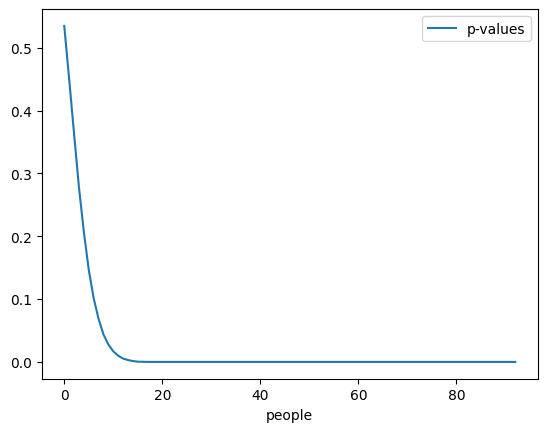

In [75]:
pvals.set_index('people').plot()

In [76]:
pvals.head(18)

,people,p-values
0,0,0.5348
1,1,0.4498
2,2,0.3632
3,3,0.2777
4,4,0.2067
5,5,0.1464
6,6,0.1013
7,7,0.0685
8,8,0.0437
9,9,0.0277


# P-value with statistical test